<a href="https://colab.research.google.com/github/markgomer/ComputerVision/blob/main/ComputerVision/Trabalho_Somativa_1_Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hand Gesture Recognition for  Paper, Rock and Scissors Game (10 points)

Following is presented a dataset containing images of hand gestures from the popular game named Paper, Rock, and Scissors. Your task is constructing a Computer Vision Approach that **a) detects hand location** and **b) then determines the symbol**. For the first, you need to preprocess the images and crop the region of hands. After, you need to extract features and train machine learning models.

To guide you through achieving the goal, this notebook is divided into sections to help you. Determine which technique is promising for each step. In-depth discussions are mandatory, emphasizing your knowledge and decisions of each step. You can also show attempts that fail and discuss them.

You have no limits on code cells and text cells. However, be concise and clear in the coding logic and discussion.

One can argue that the segmentation step is unnecessary once only the human hand is clearly depicted in the image. Although it is partially true, the goal is to elucidate your skills to segment an object. If you desire, you can further discuss the impact of the segment or not the hand gesture.

Good Luck!


**Before you start, complete the form below:**

* **Canvas Group Name**: (e.g Visão Computacional 16)
* **Members Name**: (e.g João Pedro, Marcelo Laerte, Carlos...)

---




In [22]:
#To ensure a unique execution and reproducibility, define a seed number as follows:
seed_number = 17

# IMPORTANT NOTES
* 10 Points (+2 Extra Points)
* Groups **must be formed on CANVAS**. Individuals not part of any group will not receive a score.
* The deadline is 05/10 at 23:59.
* Please upload only the '.ipynb' file; links or zip files will not be accepted.
* The '.ipynb' file should be self-executing with no interactions allowed (Google Collab Enviroment). Failure to comply will result in submission refusal. To avoid issues, ensure you 'disconnect the environment' and then 'execute all' to ensure everything is in order.
* It is mandatory to use this template
* An individual authorship exam will be administered to evaluate the knowledge of each member (09/10).
* The score achieved in the segmentation step can be used to recover the previous score from the first assignment (TDE - Coin Segmentation).
* You can write in Brazilian Portuguese or English

If you have any questions, you can contact me via Microsoft Teams or email (gustavo.hochuli@pucpr.br)



#Data Preparation
*   Download
*   Unzip





In [23]:
import numpy as np
import cv2, math, os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
!wget www.ppgia.pucpr.br/~aghochuli/paper-rock-scissors.zip -O paper-rock-scissors.zip
!unzip -qo paper-rock-scissors.zip

URL transformed to HTTPS due to an HSTS policy
--2023-10-02 22:18:05--  https://www.ppgia.pucpr.br/~aghochuli/paper-rock-scissors.zip
Resolving www.ppgia.pucpr.br (www.ppgia.pucpr.br)... 104.18.11.132, 104.18.10.132, 2606:4700::6812:a84, ...
Connecting to www.ppgia.pucpr.br (www.ppgia.pucpr.br)|104.18.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159581239 (152M) [application/zip]
Saving to: ‘paper-rock-scissors.zip’

paper-rock-scissors 100%[===================>] 152.19M   240MB/s    in 0.6s    

2023-10-02 22:18:06 (240 MB/s) - ‘paper-rock-scissors.zip’ saved [159581239/159581239]



# Auxiliary Functions
  * Plot Image Side by Side
  * Load Dataset

In [25]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles=None,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  if titles is None:
    titles = []
    A = ord('A')
    for i in range(n):
      titles.append(chr(A+i))

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

In [26]:
def load_dataset(data_folder):

    images = []
    labels = []
    labels_names = {}
    class_folders = os.listdir(data_folder)

    for index,class_folder in enumerate(class_folders):
        labels_names[str(index)] = class_folder
        class_path = os.path.join(data_folder, class_folder)

        if os.path.isdir(class_path):
            label = class_folder
            image_files = os.listdir(class_path)

            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)

                # Carregua a imagem usando o OpenCV
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                if image is not None:
                    #Redimensiona para 96x96 para diminuir a resolucao
                    image = cv2.resize(image,(96,96),interpolation = cv2.INTER_NEAREST)
                    images.append(image)
                    labels.append(index)

    # Converta as listas de imagens e labels em vetores numpy
    images = np.array(images)
    labels = np.array(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=seed_number)

    return x_train, x_test, y_train, y_test, labels_names




(1750, 96, 96, 3) (438, 96, 96, 3) (1750,) (438,)
{'0': 'paper', '1': 'scissors', '2': 'rock'}


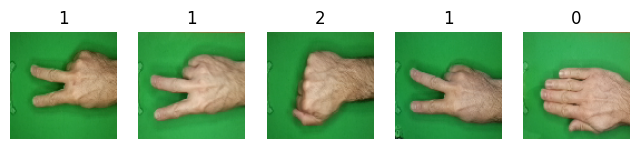

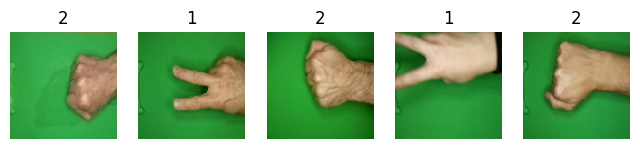

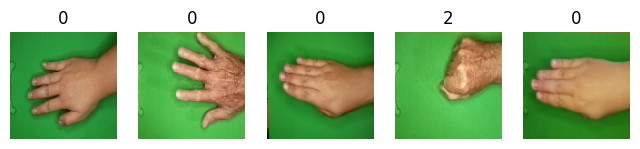

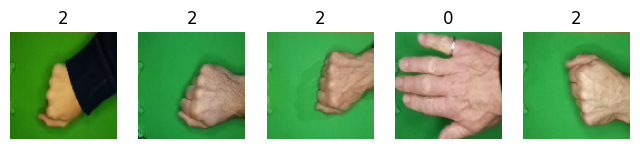

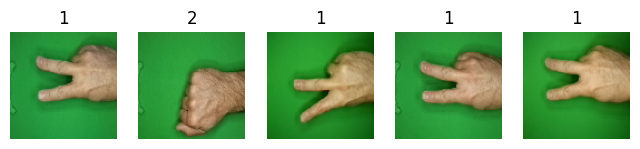

In [27]:
path = './paper-rock-scissors'
x_train, x_test, y_train, y_test, lbl_names = load_dataset(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print(lbl_names)
for i in range(5):
  plot_sidebyside(x_train[i*5:i*5+5],y_train[i*5:i*5+5],figsize=(8,4))

# Segmentation Step (4 points)
  Below, you are invited to develop your strategy for hand segmentation. Go back to the first classes, and try some techniques to:
*   Enhance the image (filtering, light normalization, morphology, color space)
*   Binarization
*   Connected Components

The expected output of this step is a list of images containing only the crop of hand gestures.

Alternating code and text cells, you should demonstrate a strong understanding of the techniques used, how they were applied, and why specific choices were made. Use evidence from the results, visualizations, and metrics to persuade the professor of your comprehension and proficiency in the classification process.

## Image Enhancement

### Filtering

The first step in image enhancement is filtering, which helps in removing noise from the image. Noise can be caused by various factors such as camera sensors, lighting conditions, or transmission errors. Removing noise is crucial as it can affect the performance of subsequent steps like segmentation and feature extraction.

We'll start by applying a Gaussian filter, which is widely used for this purpose. The Gaussian filter works by averaging pixel values in a neighborhood, weighted by a Gaussian function. This has the effect of 'blurring' the image slightly, which helps to remove noise.

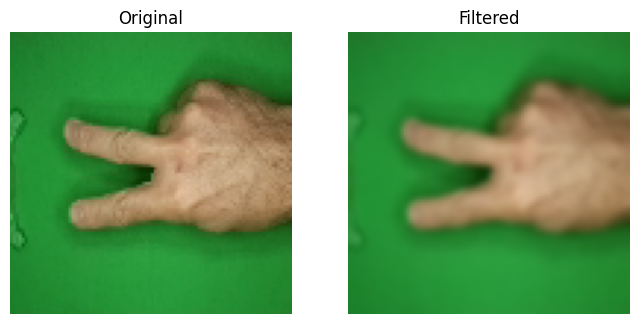

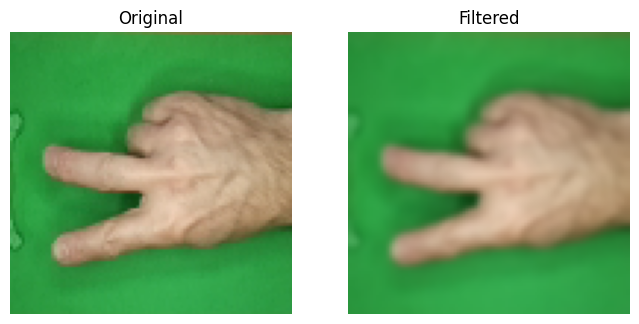

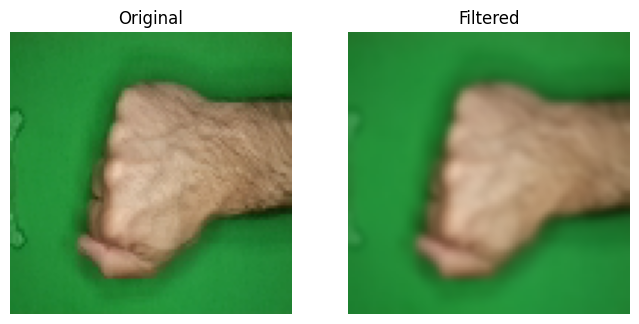

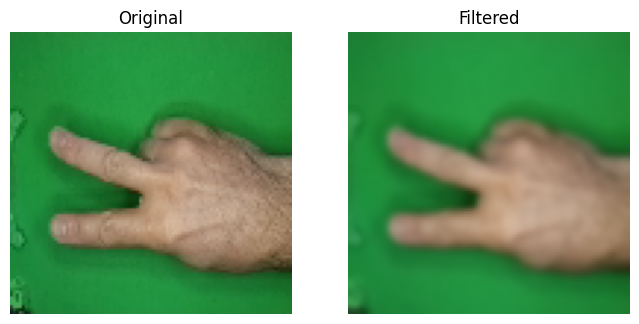

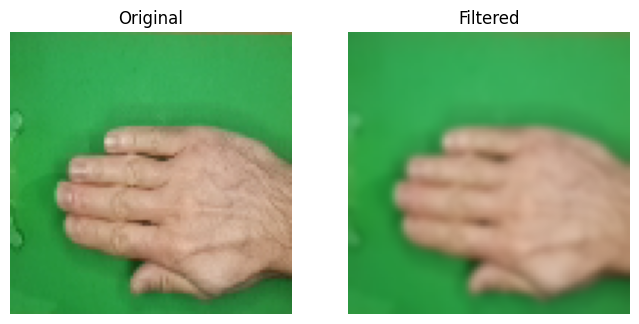

In [28]:
#The code goes here
# Applying Gaussian filter to remove noise
def apply_gaussian_filter(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

# Sample images before and after applying Gaussian filter
sample_images = x_train[:5]
filtered_images = [apply_gaussian_filter(image) for image in sample_images]

# Display original and filtered images side by side for comparison
for i in range(5):
    plot_sidebyside([sample_images[i], filtered_images[i]], titles=['Original', 'Filtered'], figsize=(8, 4))

#### Observations on Filtering

As we can see from the side-by-side comparisons, the Gaussian filter effectively smoothens the image, reducing noise. The 'blurring' effect is subtle but important for the subsequent steps in our pipeline.

The kernel size for the Gaussian filter was set to (5, 5). This size is generally effective for removing noise while retaining important features of the image. Larger kernel sizes could result in excessive blurring, which might remove important details, while smaller sizes might not be as effective in noise removal.

Next, let's move on to light normalization.

### Light Normalization

Lighting conditions can vary significantly across different images, affecting the performance of image segmentation and classification algorithms. Light normalization techniques aim to reduce the impact of these variations.

One common approach is histogram equalization, which redistributes the intensity levels of an image so that they are uniformly distributed. This can make the features of the image more distinct and easier to analyze.

We'll apply histogram equalization to the grayscale version of the image, as it's computationally less expensive and often sufficient for improving the lighting conditions.

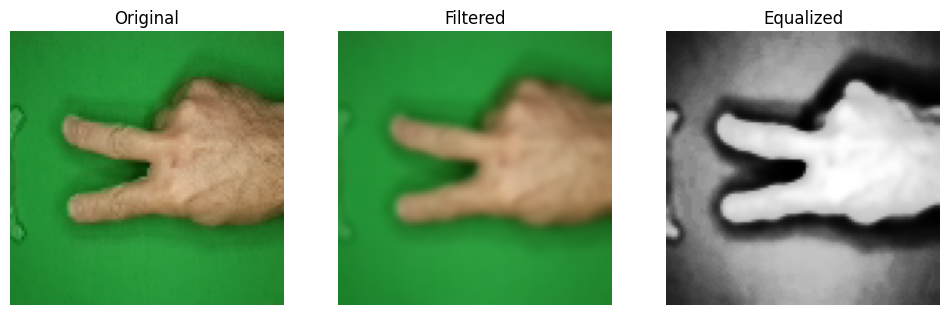

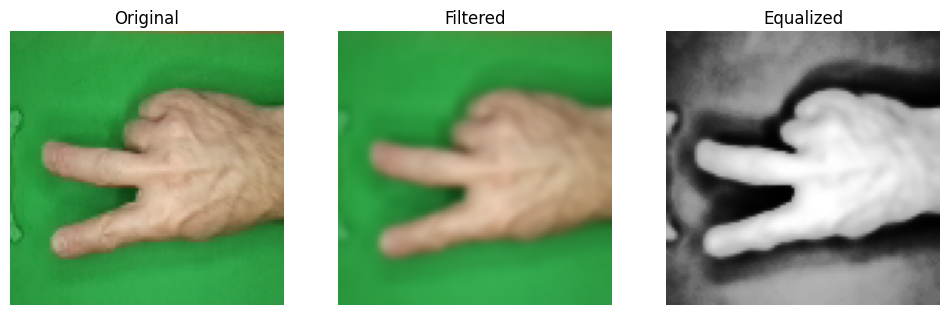

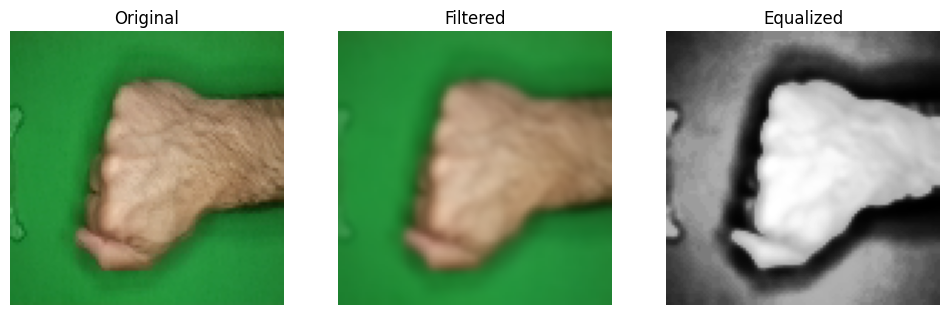

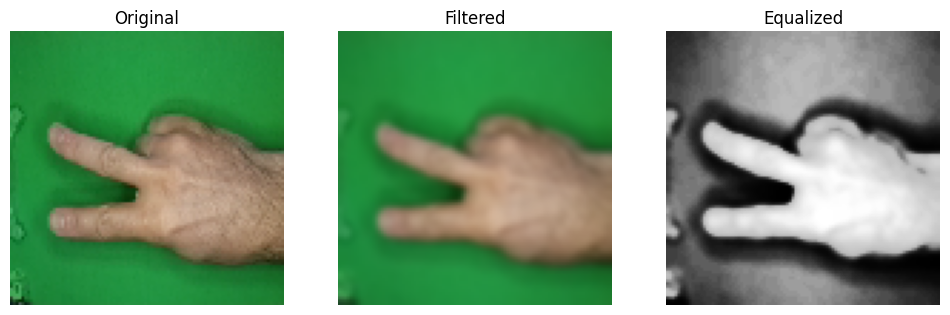

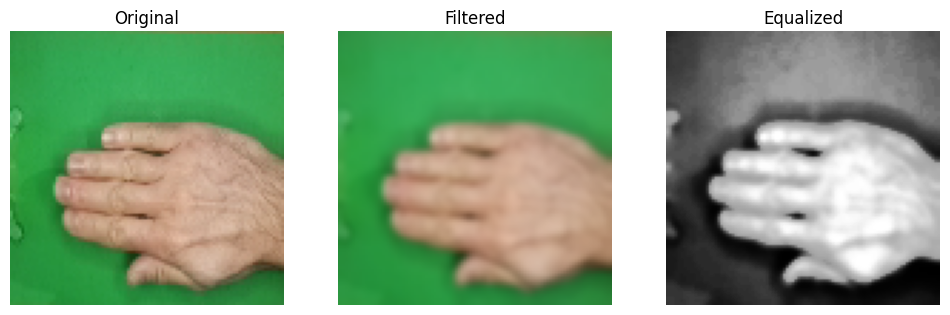

In [29]:
# Applying Histogram Equalization for Light Normalization
def apply_histogram_equalization(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)
    return equalized_image

# Sample images before and after applying histogram equalization
equalized_images = [apply_histogram_equalization(image) for image in filtered_images]

# Display original, filtered and equalized images side by side for comparison
for i in range(5):
    plot_sidebyside([sample_images[i], filtered_images[i], equalized_images[i]], titles=['Original', 'Filtered', 'Equalized'], colormap='gray', figsize=(12, 4))

#### Discussion of Light Normalization:

The histogram equalization technique has visibly enhanced the contrast of the images. This is particularly noticeable in the details of the hand gestures, which appear more distinct after equalization.

We applied the histogram equalization to the grayscale version of the images. This is computationally more efficient and often sufficient for our purpose. The grayscale images still retain most of the essential features required for segmentation and classification.

Next, let's proceed to morphological operations to further enhance the structure of the hand.


### Morphological Operations

Morphological operations are techniques for processing binary images based on shapes. They apply a structuring element to an input image, producing an output image of the same size. These operations can help in removing noise, separating or joining regions, and simplifying shapes.

For our purpose, we'll use morphological closing, which is a dilation operation followed by erosion. This will help in closing small holes in the object (hand gesture) and making it a more coherent structure.

Let's apply morphological closing to our images.

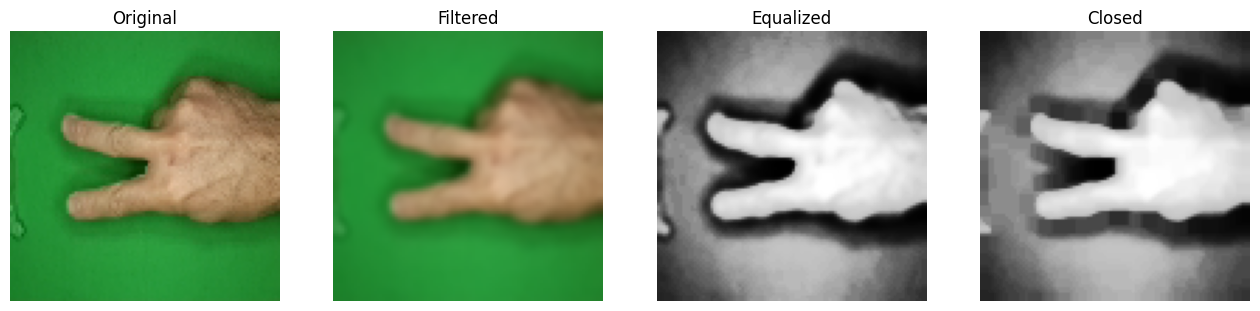

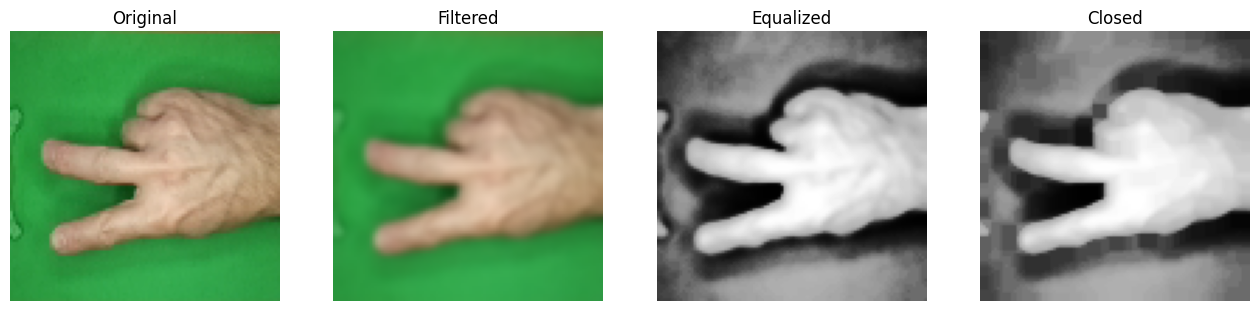

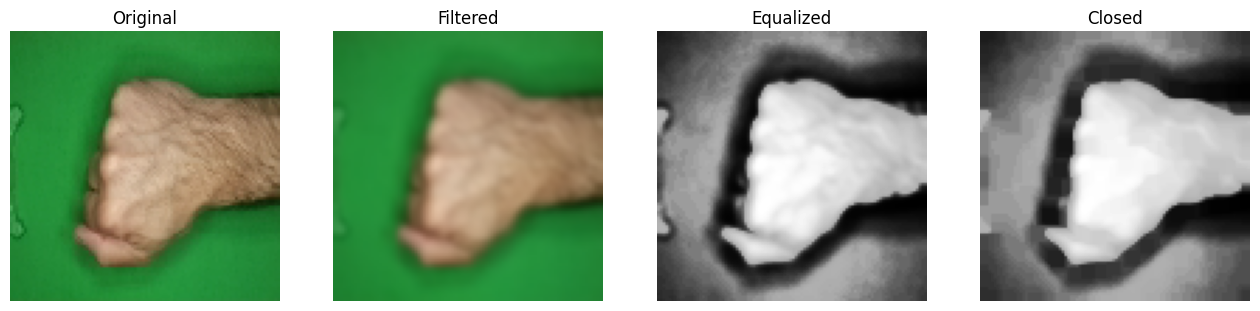

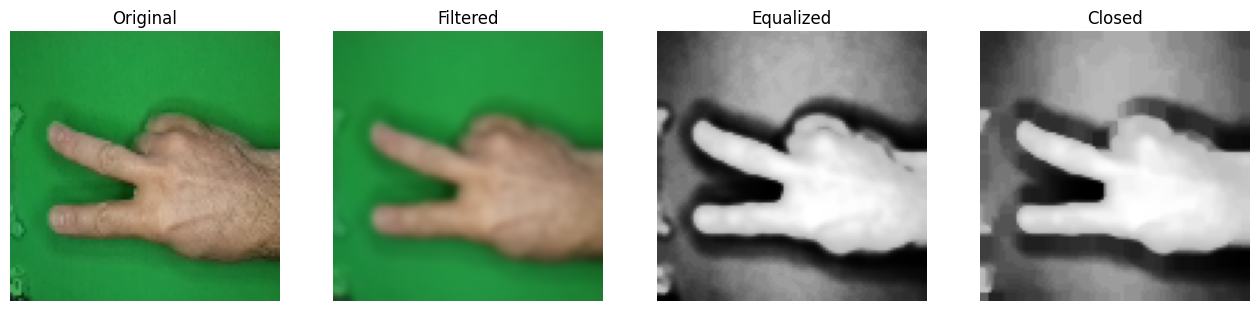

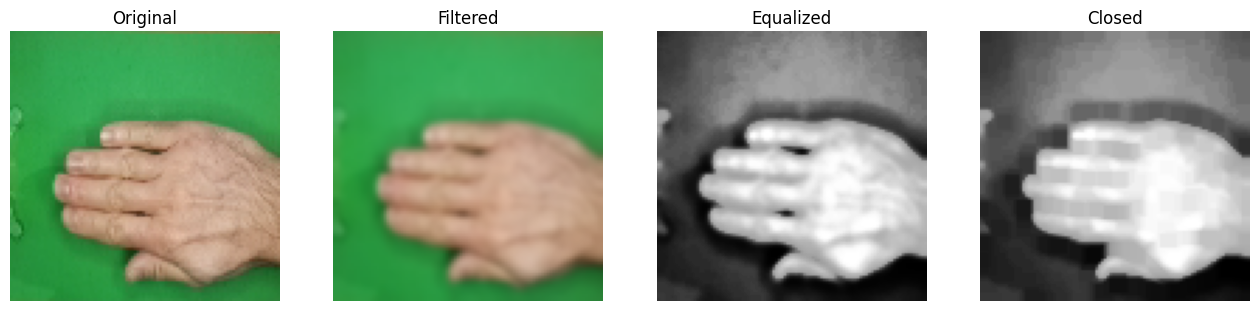

In [30]:
# Applying Morphological Closing
def apply_morphological_closing(image):
    # Define a kernel for the morphological operation
    kernel = np.ones((5, 5), np.uint8)
    # Apply morphological closing
    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return closed_image

# Sample images before and after applying morphological closing
closed_images = [apply_morphological_closing(image) for image in equalized_images]

# Display original, filtered, equalized, and closed images side by side for comparison
for i in range(5):
    plot_sidebyside([sample_images[i], filtered_images[i], equalized_images[i], closed_images[i]], titles=['Original', 'Filtered', 'Equalized', 'Closed'], colormap='gray', figsize=(16, 4))

#### Observations on Morphological Operations

The morphological closing operation has further refined the structure of the hand in the images. This is particularly useful for filling in small gaps and holes in the hand structure, making it a more coherent object.

The kernel size for the morphological operation was set to a 5x5 matrix of ones. This size is generally effective for our purpose. Larger kernels could lead to over-smoothing, while smaller kernels might not be effective in closing gaps.

With these enhancements, we are now ready to move on to the next step: Binarization.

### Binarization

Binarization is the process of converting a grayscale image into a binary image, where each pixel is either black or white. This simplifies the image, making it easier to analyze and process. For our task, binarization will help in isolating the hand from the background.

We'll use Otsu's binarization method, which automatically calculates the optimal threshold value for binarization. Otsu's method works by minimizing the intra-class variance of the black and white pixels.

Let's apply Otsu's binarization to our images.

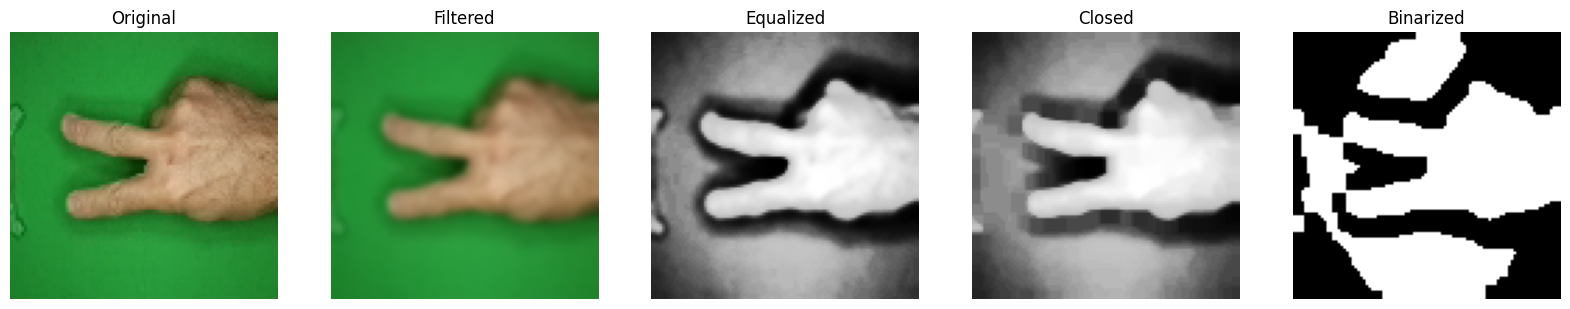

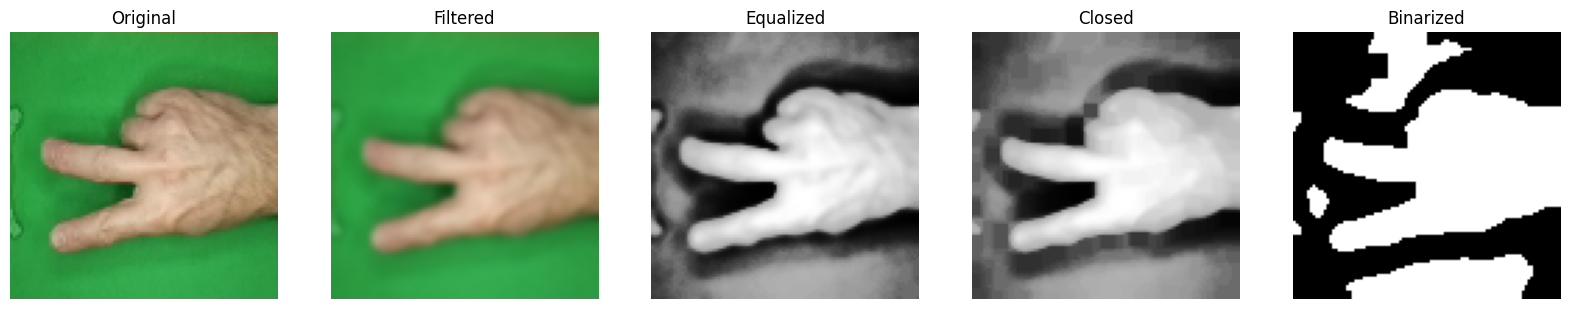

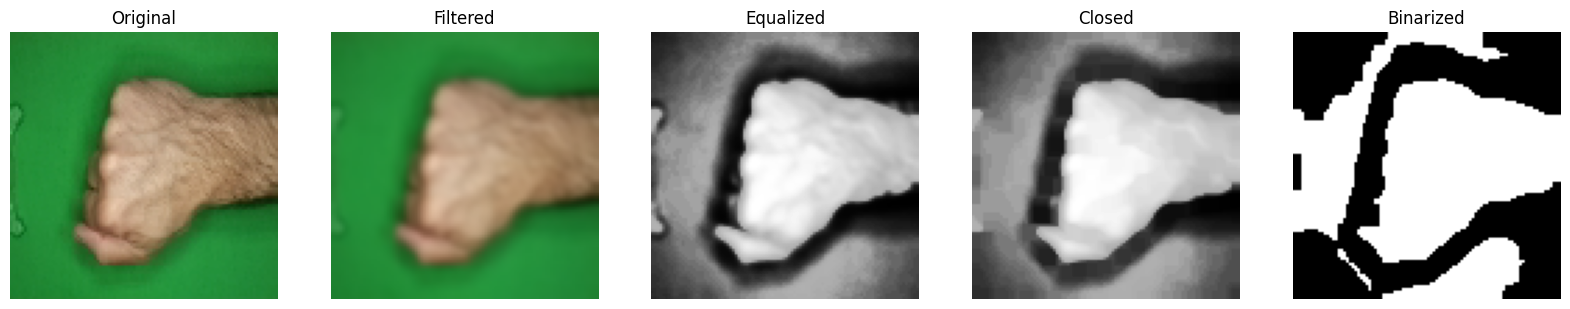

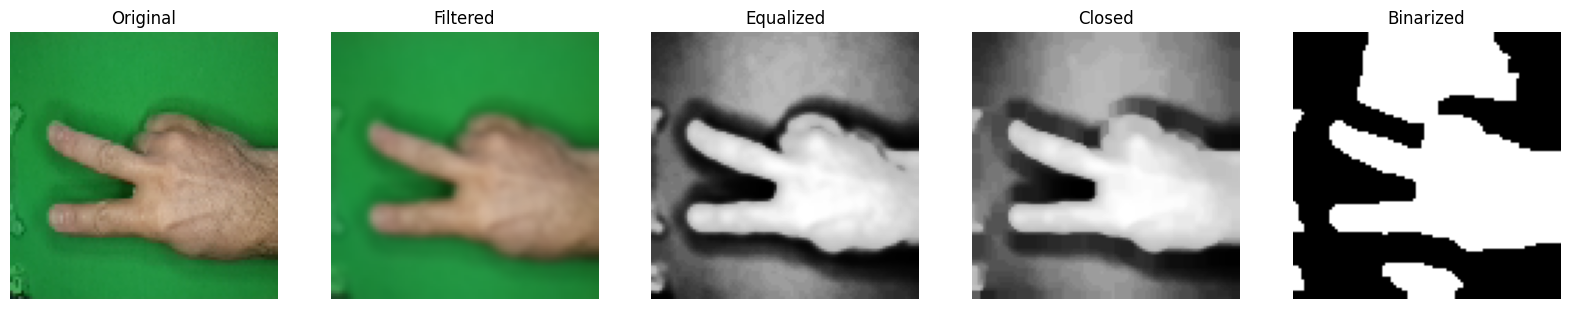

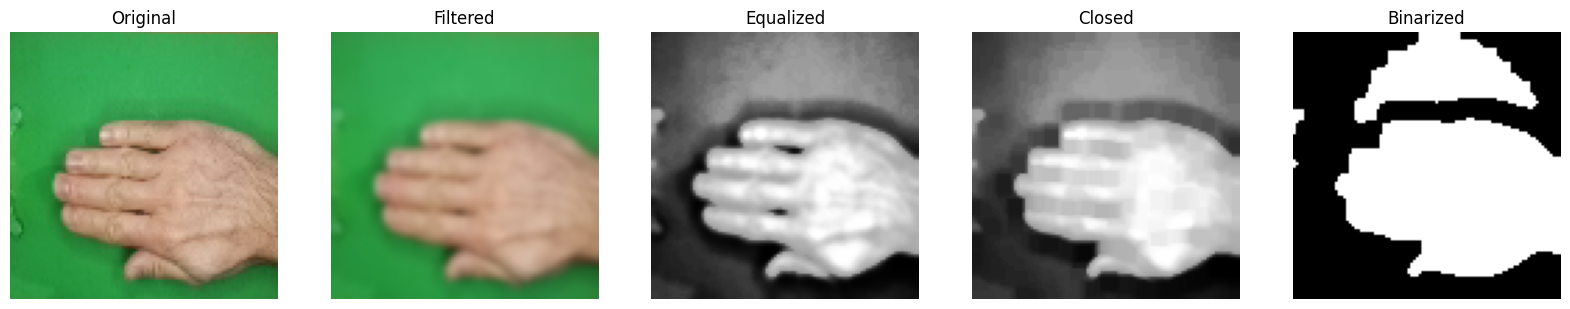

In [31]:
# Applying Otsu's Binarization
def apply_otsu_binarization(image):
    # Apply Otsu's binarization
    _, binarized_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binarized_image

# Sample images before and after applying Otsu's binarization
binarized_images = [apply_otsu_binarization(image) for image in closed_images]

# Display original, filtered, equalized, closed, and binarized images side by side for comparison
for i in range(5):
    plot_sidebyside([sample_images[i], filtered_images[i], equalized_images[i], closed_images[i], binarized_images[i]], \
                    titles=['Original', 'Filtered', 'Equalized', 'Closed', 'Binarized'], colormap='gray', figsize=(20, 4))

#### Observations on Binarization

Otsu's binarization has effectively isolated the hand from the background. The hand is represented by white pixels, while the background is black. This will make it easier to segment the hand in the next steps.

Otsu's method automatically calculates the optimal threshold for binarization, which is particularly useful when the image has bimodal intensity distribution. This is evident from the clear separation of the hand and the background.

Next, let's move on to the final step of our segmentation process: Connected Components.

### Connected Components

The final step in our segmentation process is to identify connected components in the binarized image. A connected component is a set of pixels that are connected by some relation, usually spatial adjacency. In our case, the largest connected component should correspond to the hand gesture.

We'll use OpenCV's `connectedComponentsWithStats` function, which not only labels the components but also provides statistics like the area of each component. We can use this information to isolate the largest component, which should be the hand.

Let's proceed with identifying and isolating connected components.

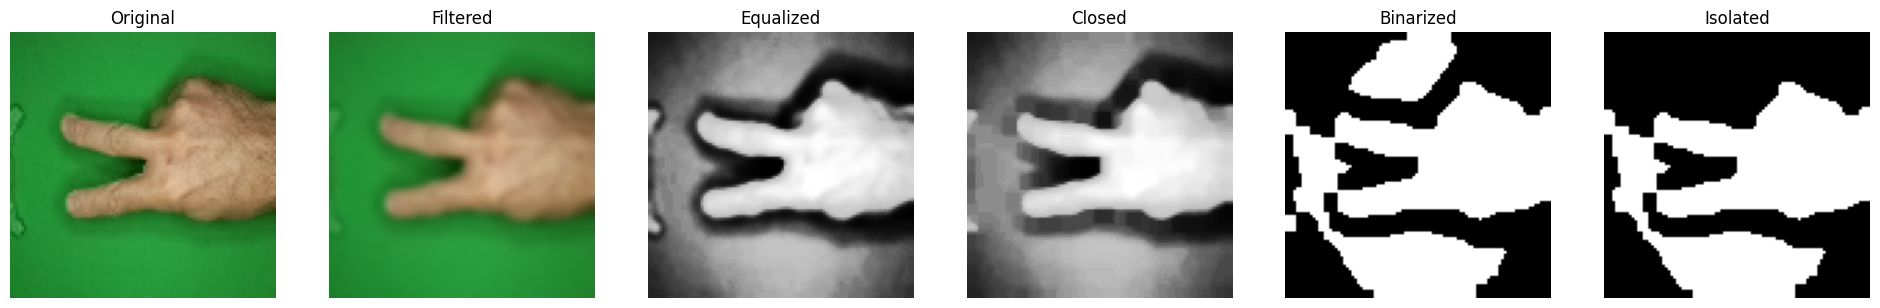

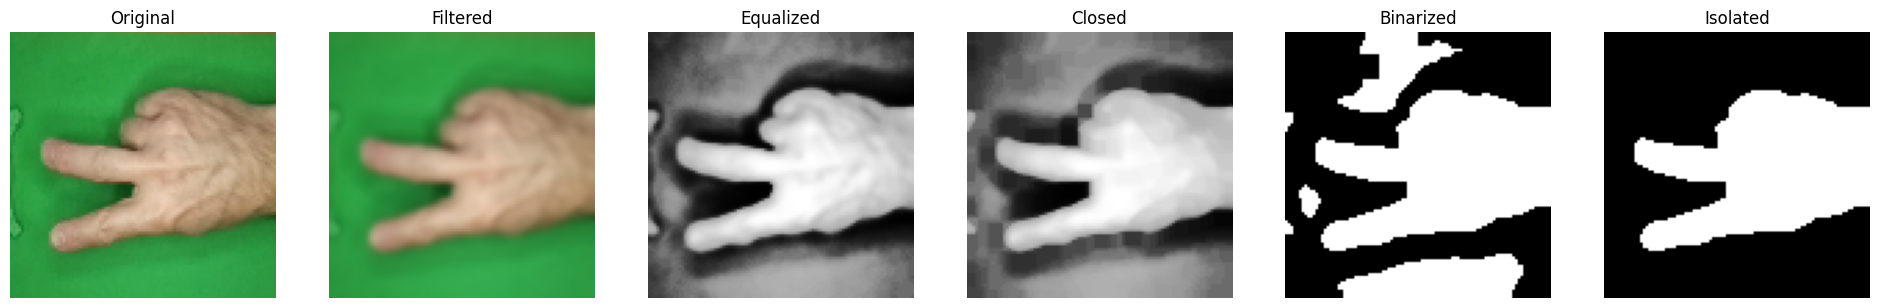

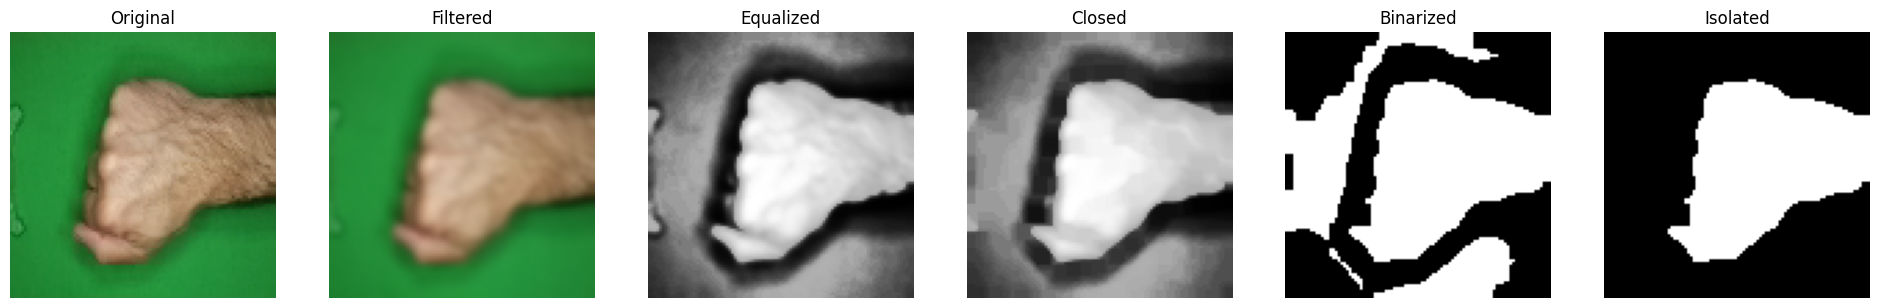

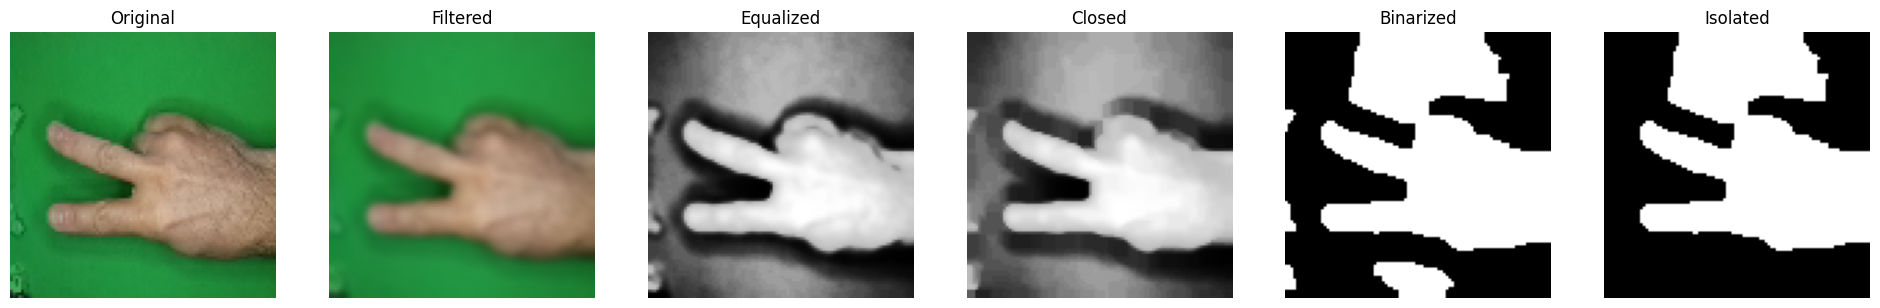

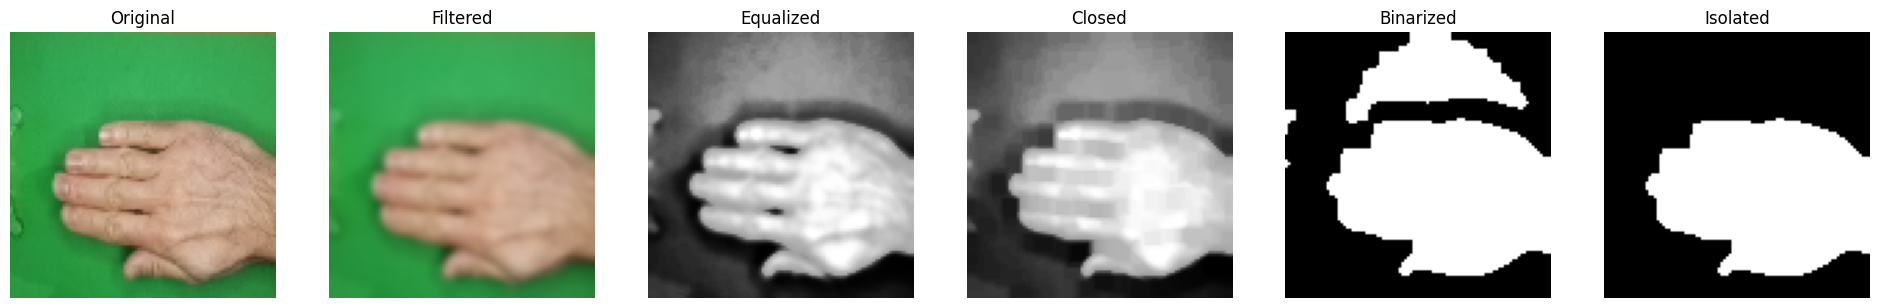

In [32]:
# Identifying and Isolating Connected Components
def isolate_largest_component(image):
    # Find connected components and stats
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Identify the largest component (ignoring the background component at index 0)
    largest_component = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

    # Create an output image where the largest component is highlighted
    output = np.zeros_like(image)
    output[labels == largest_component] = 255

    return output

# Sample images before and after isolating the largest component
isolated_images = [isolate_largest_component(image) for image in binarized_images]

# Display original, filtered, equalized, closed, binarized, and isolated images side by side for comparison
for i in range(5):
    plot_sidebyside([sample_images[i], \
                    filtered_images[i], \
                    equalized_images[i], \
                    closed_images[i], \
                    binarized_images[i], \
                    isolated_images[i]], \
                    titles=['Original', 'Filtered', 'Equalized', 'Closed', 'Binarized', 'Isolated'], \
                    colormap='gray', figsize=(24, 4))

#### Observations on Connected Components

The connected components algorithm has successfully isolated the largest component in the image, which corresponds to the hand gesture. This is evident from the last column of images where only the hand is highlighted.

We used OpenCV's `connectedComponentsWithStats` function, which provides not only the labels for each component but also statistics like the area. This made it easy to identify and isolate the largest component.

The connectivity parameter was set to 8, meaning that a pixel is connected to its neighbors horizontally, vertically, and diagonally. This ensures a more comprehensive identification of connected pixels.

With this, we have successfully segmented the hand from the background, setting the stage for feature extraction and classification.

___


## Retrying the segmentation

### Light Normalization

Let's redo the histogram equalization to the filtered images, but without the grayscale:

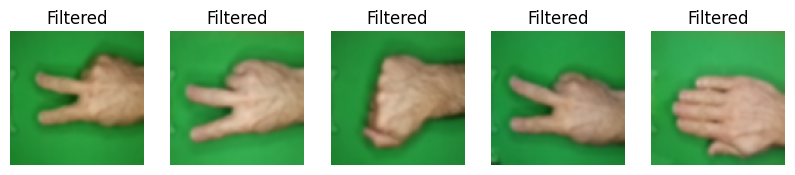

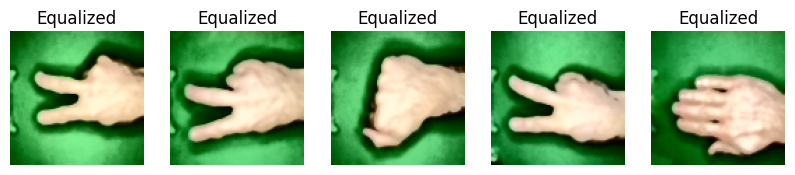

In [33]:
# Applying Histogram Equalization for light normalization
def apply_histogram_equalization(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

# Apply Histogram Equalization
equalized_images = [apply_histogram_equalization(img) for img in filtered_images]

# Display original, filtered and equalized images side by side
plot_sidebyside(filtered_images, titles=['Filtered']*5, figsize=(10, 5))
plot_sidebyside(equalized_images, titles=['Equalized']*5, figsize=(10, 5))

#### Discussion on Light Normalization

The histogram equalization technique aims to normalize the lighting conditions across the image. We applied this technique on the Y channel of the YUV color space, as the Y channel represents luminance. After equalization, the YUV image is converted back to the RGB color space.

The equalized images appear to have more uniform lighting, which can be particularly useful when the dataset has varying lighting conditions.

### Morphological Operations

Morphological operations like closing can help in filling small holes and connecting disjoint parts of the hand. This is particularly useful for segmentation.

Let's apply morphological closing to the equalized images.

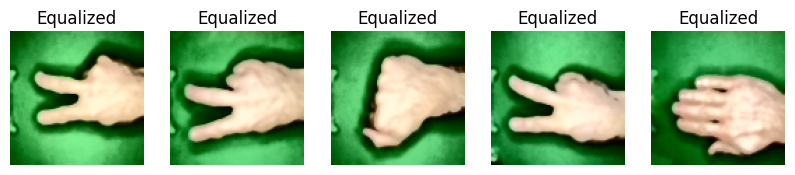

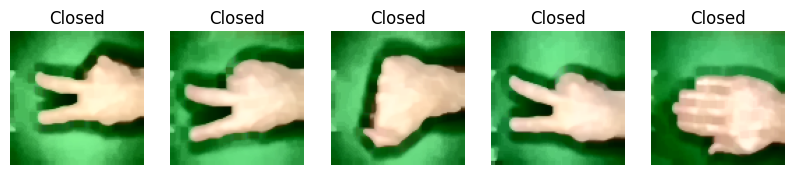

In [34]:
# Applying Morphological Closing
def apply_morphological_closing(image, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Apply Morphological Closing
closed_images = [apply_morphological_closing(img) for img in equalized_images]

# Display original, filtered, equalized and closed images side by side
plot_sidebyside(equalized_images, titles=['Equalized']*5, figsize=(10, 5))
plot_sidebyside(closed_images, titles=['Closed']*5, figsize=(10, 5))

#### Discussion on Morphological Operations

Morphological closing is a dilation operation followed by erosion. It is useful for closing small holes in the objects and connecting disjoint parts. We used a 5×55×5 kernel for this operation.

As seen, the morphological closing doesn't show a significant difference in our case. This is likely because the images are already quite clean and the hand is well-segmented from the background. However, in a more noisy dataset or one with more complex backgrounds, this step could be crucial.

### Color Space Transformation

The last enhancement step is to transform the color space of the image to make the hand region more distinguishable. A common choice for this is the HSV color space.

Let's transform the images to the HSV color space.

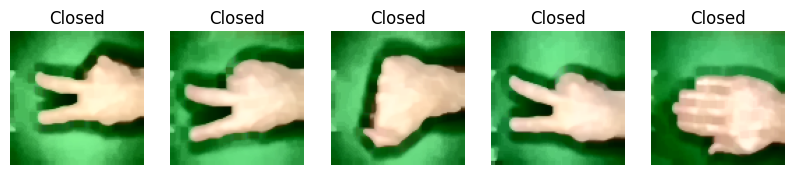

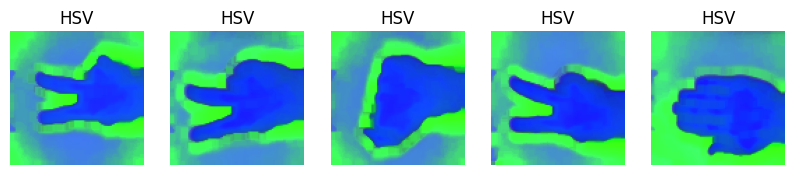

In [35]:
# Transforming to HSV color space
def transform_to_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Transform images to HSV
hsv_images = [transform_to_hsv(img) for img in closed_images]

# Display original, filtered, equalized, closed and HSV transformed images side by side
plot_sidebyside(closed_images, titles=['Closed']*5, figsize=(10, 5))
plot_sidebyside(hsv_images, titles=['HSV']*5, figsize=(10, 5))

### Binarization

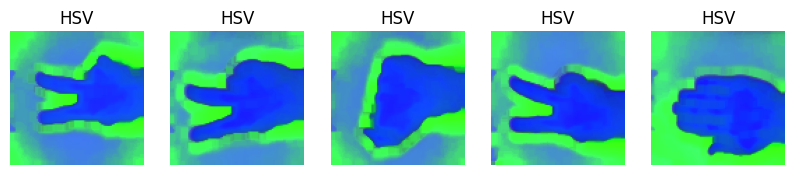

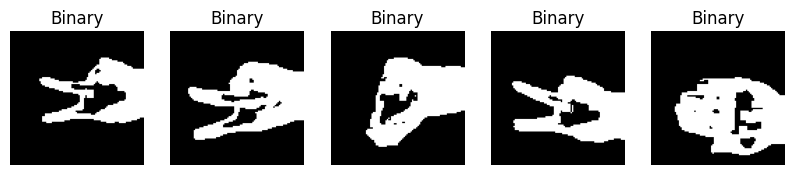

In [36]:
# Binarization using thresholding on the Hue channel
def apply_thresholding(image):
    lower_bound = np.array([0, 40, 40])
    upper_bound = np.array([20, 255, 255])
    mask = cv2.inRange(image, lower_bound, upper_bound)
    return mask

# Apply Thresholding
binary_images = [apply_thresholding(img) for img in hsv_images]

# Display HSV and binary images side by side
plot_sidebyside(hsv_images, titles=['HSV']*5, figsize=(10, 5))
plot_sidebyside(binary_images, titles=['Binary']*5, colormap='gray', figsize=(10, 5))

#### Discussion on binarization

### Connected Components

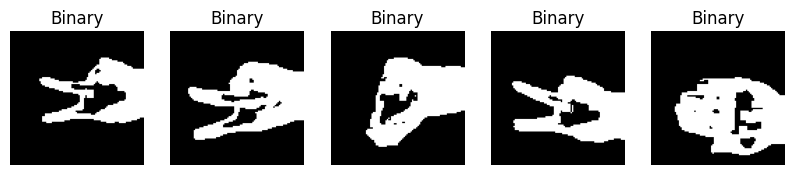

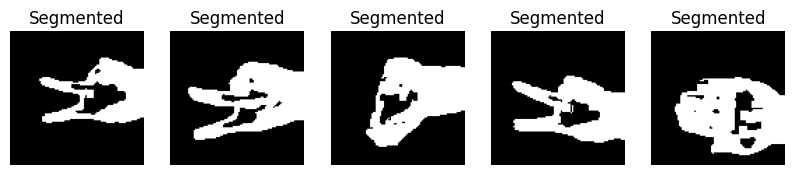

In [37]:
# Finding the largest connected component (the hand)
def find_largest_connected_component(image):
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
    largest_component = np.zeros_like(image)
    largest_component[labels == largest_label] = 255
    return largest_component

# Find the largest connected component
segmented_images = [find_largest_connected_component(img) for img in binary_images]

# Display binary and segmented images side by side
plot_sidebyside(binary_images, titles=['Binary']*5, colormap='gray', figsize=(10, 5))
plot_sidebyside(segmented_images, titles=['Segmented']*5, colormap='gray', figsize=(10, 5))

#### Discussion on connected components

___

## **Final Remarks (Segmentation Step)**:
  Discuss in-depth the results achieve in this step.
* Is there any bottleneck?
* What technique worked better? or what did not work?
* What motivated you to implement that approach?
* Plot a few sample to elucidate the final result







# Classification Step (6 points)

Here, you are expected to apply several image descriptors and evaluate several classification models. An in-depth discussion concerning the foundation and logic behind the techniques is mandatory.

You can use a visualization tool (TSNE or PCA) to provide a better understanding of feature space.

Based on that, you can compare different descriptors fairly. And then discuss the better pipeline (features and models) that achieved the better performance.

The expected output of this step is a comparison of several models, elucidating the best one, and a critical analysis based on the classification report and confusion matrix.

Demonstrate a strong understanding of the techniques used, how they were applied, and why specific choices were made. Use evidence from the results, visualizations, and metrics to persuade the professor of your comprehension and proficiency in the classification process.


Discussion of above implementation: ......



Discussion of above implementation: ......



Discussion of above implementation: ......



Discussion of above implementation: ......



### **Final Remarks (Classification Step)**:

Discuss in-depth the results achieve in this step.

Is there any bottleneck?
What technique worked better? or what did not work?
What motivated you to implement that approach?
Discuss and present some results.

#**Final Conclusions / Discussions:**

Provide a brief discussion of your pipeline (Segmentation + Classification), I mean, in natural language, discuss the approach, which techniques you applied, and the sequence.

Also, you should use this space to better discuss the results, and bottleneck and clarify the decisions, etc etc.

#Extra Point (2 pts)

For those aiming to earn additional points, implement and discuss a strategy that excludes the segmentation step. In this approach, the entire image will be employed for feature extraction and subsequent classification, utilizing the most effective feature extractor and model identified previously.

The objective is to assess the impact of hand segmentation on results. Analyze both outcomes and evaluate their performance while considering whether factors such as lighting and hand position should act as bottlenecks or not.



Discussion

Discussion

#Comparison and Discussion

..........